# **Language Detection Using Natural Language Processing**

The idea behind language detection is based on the detection of the character among the expression and words in the text. The main principle is to detect commonly used words like to, of in English. 



**About NLP:**

Natural Language Processing (NLP) is a subfield of computer science and artificial intelligence that deals with the interaction between computers and human languages. The primary goal of NLP is to enable computers to understand, interpret, and generate natural language, the way humans do.

NLP involves a variety of techniques, including computational linguistics, machine learning, and statistical modeling. These techniques are used to analyze, understand, and manipulate human language data, including text, speech, and other forms of communication.

Some of the main applications of NLP include language translation, speech recognition, sentiment analysis, text classification, and information retrieval. NLP is used in a wide range of industries, including finance, healthcare, education, and entertainment, to name a few.

**Imports and Loading Dataset:**

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#For warning-

import warnings
warnings.simplefilter("ignore")

In [3]:
#Loading Dataset-

data = pd.read_csv("/Language Detection.csv")

In [4]:
#Value count for each language-

data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

**Separating Independent and Dependent features:**

Separating the dependent and independent variables, here text data is the independent variable and the language name is the dependent variable.

In [5]:
X = data["Text"]
y = data["Language"]

**Using Label Encoding:**

For training the model we should have to convert it into a numerical form, so we are performing label encoding on that output variable. For this process, we are importing LabelEncoder from sklearn.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
print(y)

[3 3 3 ... 9 9 9]


**Text Preprocessing:**

This is a dataset created using scraping the Wikipedia, so it contains many unwanted symbols, numbers which will affect the quality of our model. So we should perform text preprocessing techniques.

In [8]:
#Creating a list for appending the preprocessed text-

data_list = []

In [9]:
#Iterating through all the text-

for text in X:

       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)

        # converting the text to lower case
        text = text.lower()
        
        # appending to data_list
        data_list.append(text)

**Bag of Words:**

As we all know that, not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(10337, 34937)

**Train Test Splitting:**

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
print('\nX_train:\n', x_train)
print('\nX_test:\n',x_test)
print('\nY_train:\n',y_train)
print('\nY_test:\n',y_test)


X_train:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

X_test:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Y_train:
 [ 4 10  0 ...  4  0  3]

Y_test:
 [ 2  3 16 ... 11 14  7]


**Model Training and Prediction:**

In [17]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [18]:
#predict the output for the test set-

y_pred = model.predict(x_test)

**Model Evaluation:**

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [20]:
#Accuracy-

print("Accuracy is :",ac)

Accuracy is : 0.9796905222437138


In [21]:
#Confusion Matrix-

print("Confusion Matrix is :",cm)

Confusion Matrix is : [[106   0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  83   0   3   1   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0  95   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 289   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   1 188   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0  79   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0  72   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  16   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 126   0   0   1   0   1   0   0   0]
 [  0   0   0   1   0   0   0   0   0  70   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0 113   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0 136   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0 145   0   0   0   0]
 [  0   0   0   2   0   0   0   0   1   0   0   0   0 1

In [24]:
#Classification_report-

print("Classification report is :",cr)

Classification report is :               precision    recall  f1-score   support

           0       1.00      0.95      0.97       112
           1       1.00      0.94      0.97        88
           2       1.00      0.98      0.99        97
           3       0.90      1.00      0.95       290
           4       0.98      0.99      0.99       189
           5       1.00      0.98      0.99        81
           6       1.00      0.96      0.98        75
           7       1.00      0.94      0.97        17
           8       0.99      0.98      0.99       128
           9       1.00      0.99      0.99        71
          10       0.98      0.98      0.98       115
          11       0.99      0.99      0.99       137
          12       1.00      0.99      1.00       146
          13       0.98      0.98      0.98       182
          14       0.99      0.98      0.99       131
          15       1.00      0.96      0.98        82
          16       1.00      0.95      0.98       127


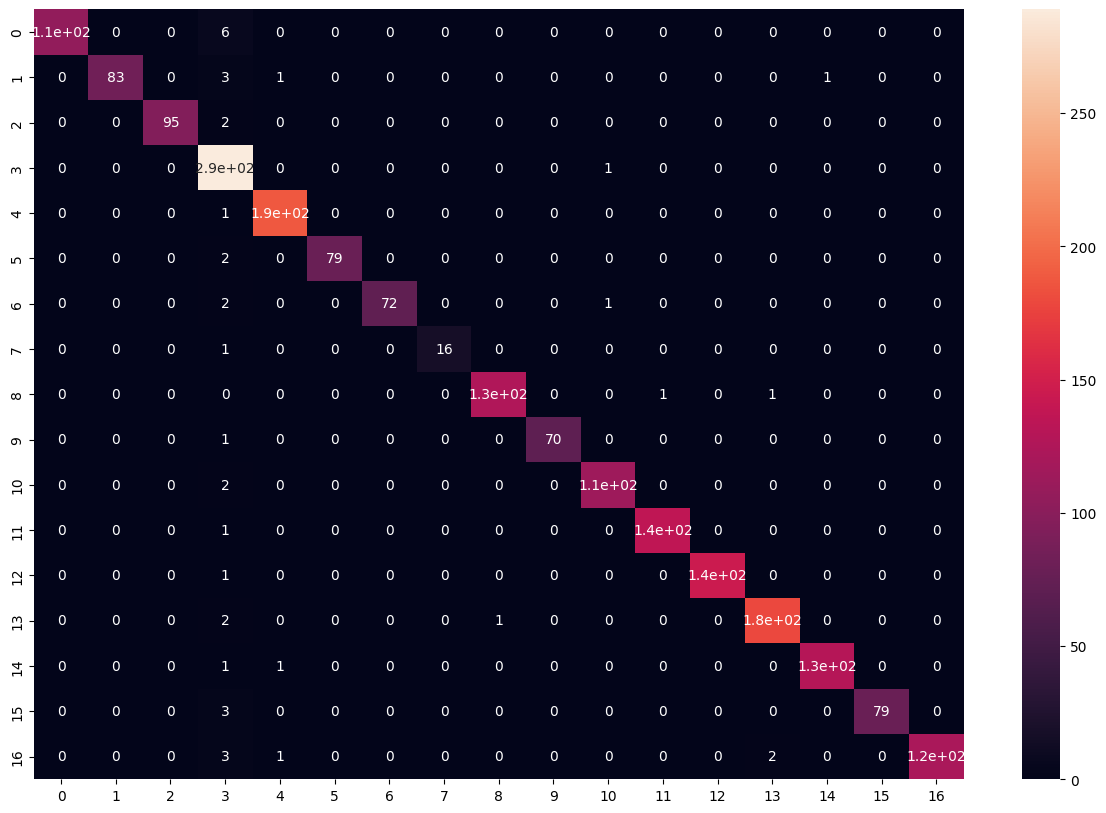

In [25]:
#Plot the confusion matrix using the seaborn heatmap-

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

**Predicting Some more Data:**

Testing the model prediction using text in different languages.

In [26]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [40]:
predict("How are you?")

The langauge is in English


In [35]:
predict("Je te rencontre au café.")

The langauge is in French


In [41]:
predict("كيف حالك")

The langauge is in Arabic


In [37]:
predict("cumplir su condena")

The langauge is in Spanish


In [39]:
predict("മലയാളം : ഇന്ത്യൻ സംസ്ഥാനമായ കേരളത്തിലും കേന്ദ്രഭരണ പ്രദേശങ്ങളായ ലക്ഷദ്വീപിലെയും പുതുച്ചേരിയിലെയും (മാഹി ജില്ല) മലയാളികൾ സംസാരിക്കുന്ന ഒരു ദ്രാവിഡ ഭാഷയാണ് മലയാളം")

The langauge is in Malayalam


In [38]:
predict("Скажите пожалуйста, как пройти в палату?")

The langauge is in Russian
